# Analysis of sold new cars in Estonia 2023

Data is taken from official source - https://www.transpordiamet.ee/soidukitega-tehtud-toimingute-statistika

Only new cars where used in this analysis.


## Initial data

In [1]:
%reload_ext autoreload
%autoreload 0

import os

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mnt_sum import (
    get_summary,
    COLUMNS,
    PRIVATE_CUSTOMER,
    COLUMN_SHORT_NAME,
    COLUMN_CUSTOMER,
    COLUMN_CITY,
)

df_o = get_summary("data/2023")
df_o.describe()

,Esm reg aasta,Mootori võimsus,Mootori maht,CO2_NEDC,CO2_WLTP,Istekohti,Telgi kokku,Registrimass,Tühimass,Täismass,Arv
count,17955.0,17955.000000,17955.000000,2073.000000,17110.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000,17955.000000
mean,2023.0,124.842077,1708.616486,109.636758,143.958504,5.139683,2.000223,2181.316625,1713.340629,2181.316625,1.280479
std,0.0,61.942102,779.885257,66.485133,51.708176,0.668507,0.014925,433.033091,388.586026,433.033091,1.929692
min,2023.0,18.600000,0.000000,0.000000,0.000000,2.000000,2.000000,1260.000000,984.000000,1260.000000,1.000000
25%,2023.0,91.900000,1482.000000,97.000000,123.000000,5.000000,2.000000,1880.000000,1445.000000,1880.000000,1.000000
50%,2023.0,110.000000,1598.000000,119.000000,139.000000,5.000000,2.000000,2090.000000,1626.000000,2090.000000,1.000000
75%,2023.0,132.400000,1987.000000,143.000000,163.000000,5.000000,2.000000,2401.000000,1876.000000,2401.000000,1.000000
max,2023.0,607.000000,6749.000000,399.000000,456.000000,9.000000,3.000000,5500.000000,4920.000000,5500.000000,71.000000


In [3]:
df_o.head()

,Kategooria,Mark,Mudel,Tüüp,Kere nimetus,Keretüüp,Esm reg aasta,Kütusekombinatsioon,Mootori tüüp,Mootori võimsus,...,Tühimass,Täismass,Värv,Käigukasti tüüp,Maakond,Linn,Tüüp (isik),Arv,name,short name
107,M1,AUDI,A3 LIMOUSINE,GY,SEDAAN,AA,2023,BENSIIN-ELEKTER,BENSIIN_HYBRIID,110.0,...,1459,1880,MUST,AUTOMAAT,HARJU MAAKOND,Tallinn,FÜÜSILINE,1,AUDI A3 LIMOUSINE,AUDI A3
108,M1,AUDI,A3 SPORTBACK,GY,LUUKPÄRA,AB,2023,BENSIIN,BENSIIN_KATALYSAATOR,140.0,...,1575,2000,SININE,AUTOMAAT,HARJU MAAKOND,Tallinn,JURIIDILINE,1,AUDI A3 SPORTBACK,AUDI A3
109,M1,AUDI,A3 SPORTBACK,GY,LUUKPÄRA,AB,2023,BENSIIN-ELEKTER,BENSIIN_HYBRIID,81.0,...,1370,1835,VALGE,AUTOMAAT,HARJU MAAKOND,Tallinn,JURIIDILINE,4,AUDI A3 SPORTBACK,AUDI A3
110,M1,AUDI,A4 LIMOUSINE,B8,SEDAAN,AA,2023,BENSIIN-ELEKTER,BENSIIN_HYBRIID,110.0,...,1620,2040,HALL,AUTOMAAT,HARJU MAAKOND,Tallinn,JURIIDILINE,8,AUDI A4 LIMOUSINE,AUDI A4
111,M1,AUDI,A4 LIMOUSINE,B8,SEDAAN,AA,2023,BENSIIN-ELEKTER,BENSIIN_HYBRIID,110.0,...,1620,2040,MUST,AUTOMAAT,HARJU MAAKOND,Tallinn,JURIIDILINE,2,AUDI A4 LIMOUSINE,AUDI A4


In [4]:
df = df_o[COLUMNS]

df.head()

,Mark,Mudel,short name,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp (isik),Arv,Värv
107,AUDI,A3 LIMOUSINE,AUDI A3,BENSIIN_HYBRIID,1498,110.0,Tallinn,FÜÜSILINE,1,MUST
108,AUDI,A3 SPORTBACK,AUDI A3,BENSIIN_KATALYSAATOR,1984,140.0,Tallinn,JURIIDILINE,1,SININE
109,AUDI,A3 SPORTBACK,AUDI A3,BENSIIN_HYBRIID,999,81.0,Tallinn,JURIIDILINE,4,VALGE
110,AUDI,A4 LIMOUSINE,AUDI A4,BENSIIN_HYBRIID,1984,110.0,Tallinn,JURIIDILINE,8,HALL
111,AUDI,A4 LIMOUSINE,AUDI A4,BENSIIN_HYBRIID,1984,110.0,Tallinn,JURIIDILINE,2,MUST


## Add additional data

In [5]:
import yaml
from utils.file import read_file

SUVS = set(yaml.safe_load(read_file("data/suvs.yaml").lower()))

df["SUV"] = df[COLUMN_SHORT_NAME].str.lower().isin(SUVS)
df[df["SUV"]].head(5)

/tmp/ipykernel_585127/968145016.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SUV'] = df[COLUMN_SHORT_NAME].str.lower().isin(SUVS)


,Mark,Mudel,short name,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp (isik),Arv,Värv,SUV
126,AUDI,E-TRON GT,AUDI E-TRON,ELEKTER,0,140.0,Määramata,JURIIDILINE,1,MUST,True
127,AUDI,E-TRON GT,AUDI E-TRON,ELEKTER,0,140.0,Tallinn,JURIIDILINE,1,TUMEPRUUN,True
128,AUDI,E-TRON SPORTBACK 55,AUDI E-TRON,ELEKTER,0,158.0,Tallinn,FÜÜSILINE,1,VALGE,True
129,AUDI,E-TRON SPORTBACK 55,AUDI E-TRON,ELEKTER,0,158.0,Narva,FÜÜSILINE,1,VALGE,True
130,AUDI,E-TRON SPORTBACK 55,AUDI E-TRON,ELEKTER,0,158.0,Määramata,JURIIDILINE,1,MUST,True


# Total sold cars

In [6]:
df["Arv"].sum()

22991

# Popular fuels

                       Arv
Mootori tüüp              
BENSIIN_KATALYSAATOR  8866
BENSIIN_HYBRIID       8445
DIISEL                2869
ELEKTER               1448
DIISEL_HYBRIID        1248
CNG                     66
BENSIIN                 49


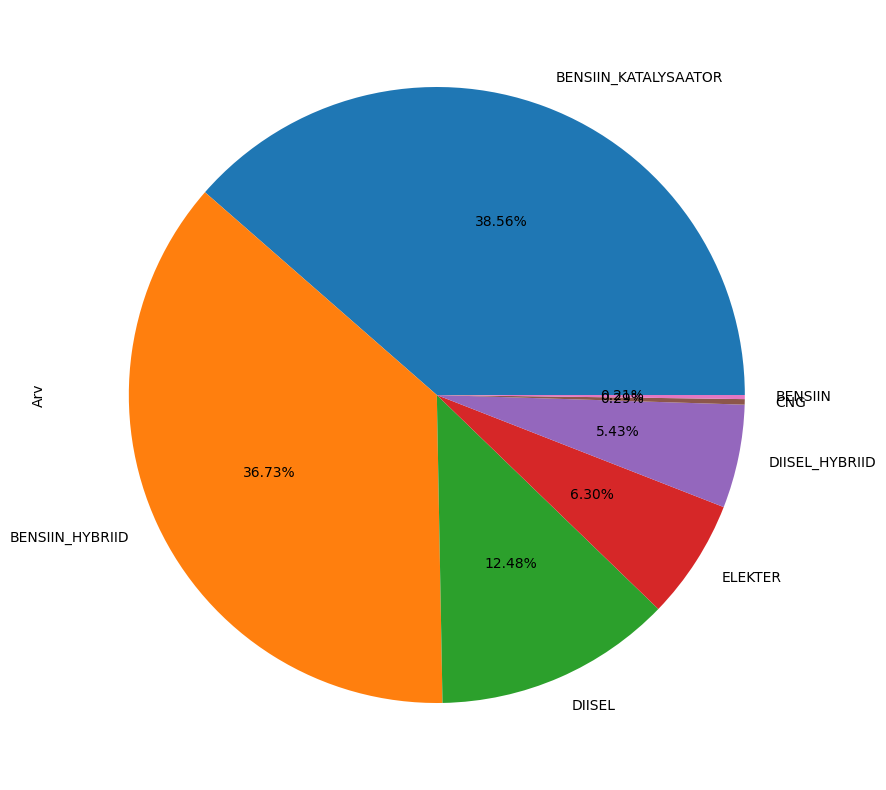

In [7]:
def show_pie(dataframe, groupby, index=None):
    plt.figure(figsize=(10, 10))
    dataframe = (
        dataframe.groupby([groupby], as_index=False)["Arv"]
        .sum()
        .sort_values("Arv", ascending=False)
        .reset_index(drop=True)
    )
    if index:
        dataframe.index = index
    else:
        dataframe = dataframe.set_index(groupby)
    dataframe["Arv"].plot.pie(autopct="%1.2f%%")
    print(dataframe)


show_pie(df, "Mootori tüüp")

# Popular colors

               Arv
Värv              
HALL          7254
MUST          4119
VALGE         3740
SININE        2127
PUNANE        1507
ROHELINE       860
TUMEHALL       795
HÕBEDANE       710
ORANŽ          390
PRUUN          376
BEEŽ           216
TUMESININE     171
KOLLANE        170
TUMEPUNANE     119
LILLA           76
HELEHALL        67
KULDNE          63
HELEROHELINE    55
TUMEROHELINE    53
HELEPRUUN       47
HELESININE      32
TUMEPRUUN       31
HELEBEEŽ         8
ROOSA            2
HELEKOLLANE      1
TUMEKOLLANE      1
MÄÄRAMATA        1


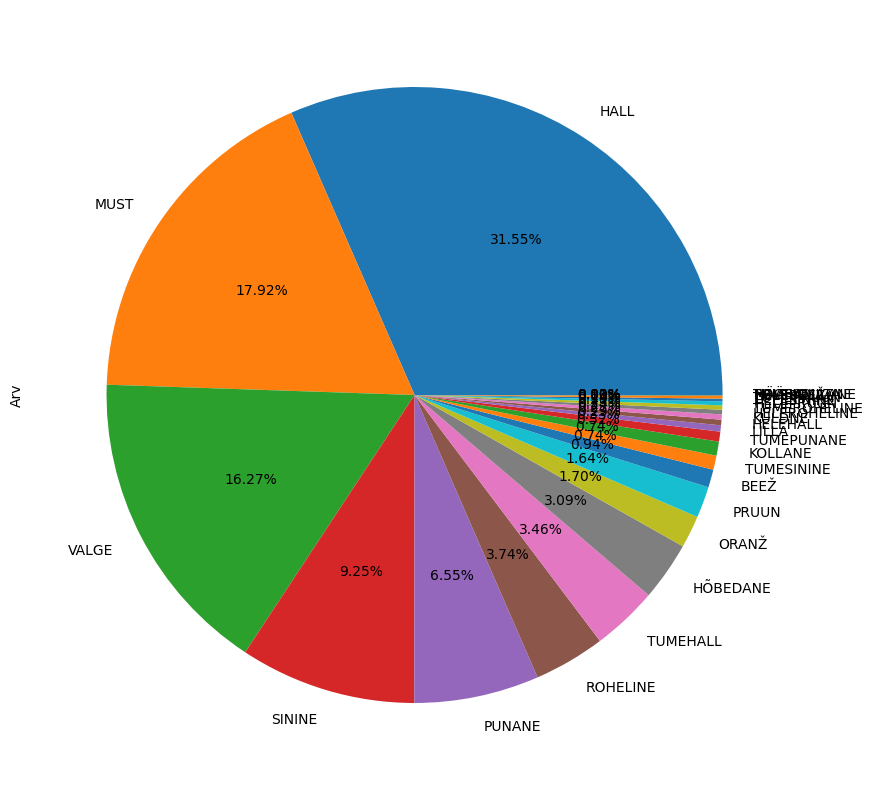

In [8]:
show_pie(df, "Värv")

# Engine capacities

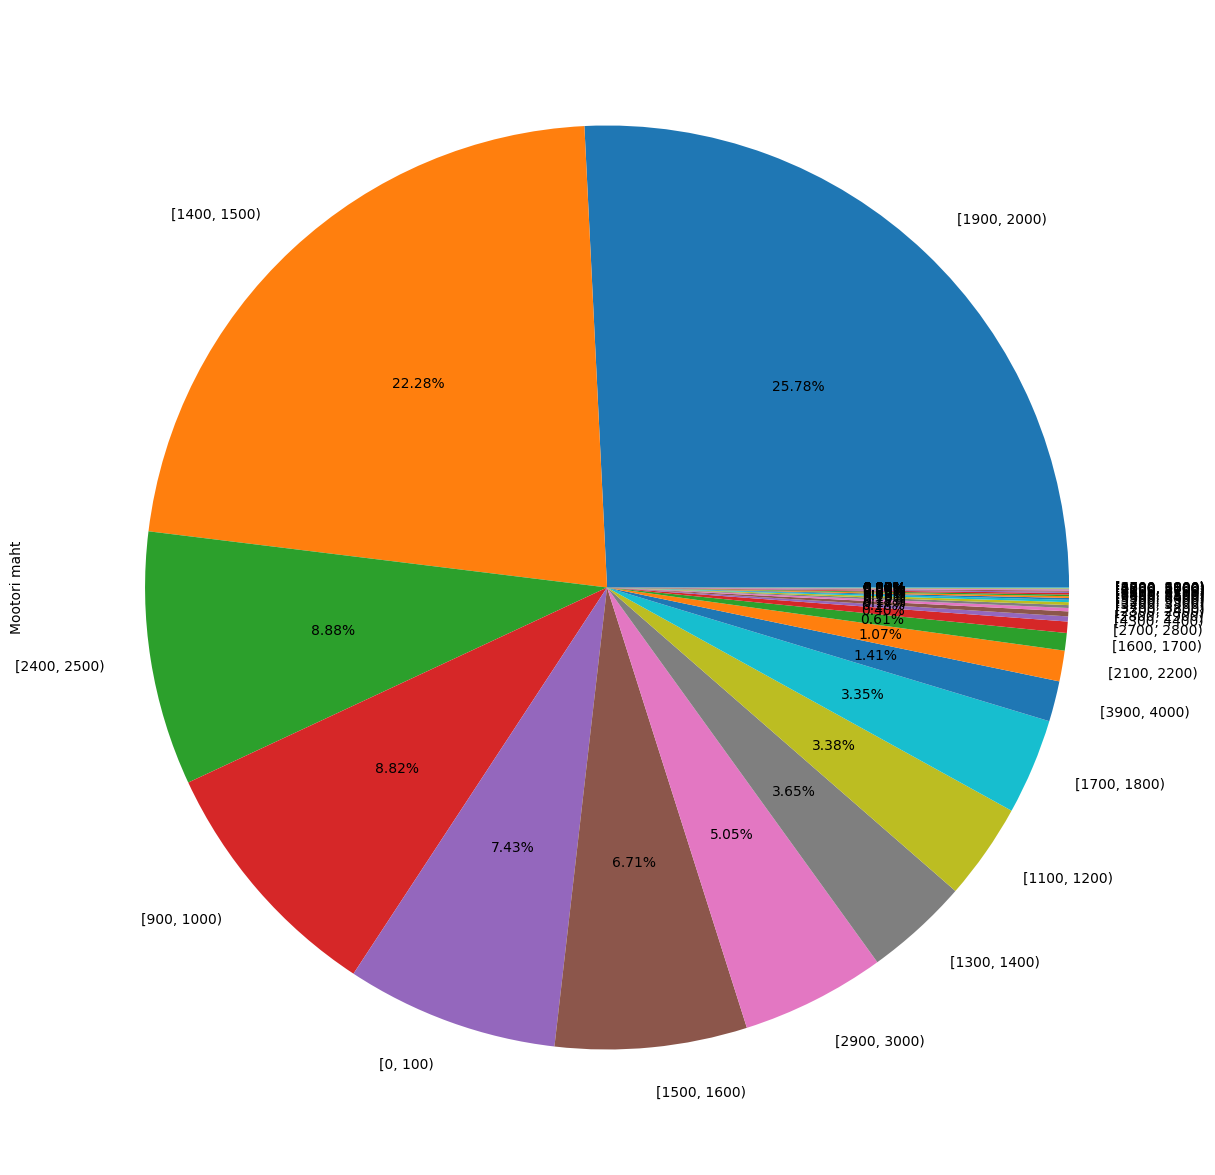

In [9]:
plt.figure(figsize=(15, 15))

bins = range(df["Mootori maht"].min(), df["Mootori maht"].max() + 100, 100)
capacities = pd.cut(df["Mootori maht"], bins, right=False).value_counts()
capacities.plot(kind="pie", autopct="%1.2f%%")
pass

# Top 10 popular manufacturers

          Mark   Arv
1       TOYOTA  4211
2        SKODA  3358
3         AUDI  2544
4          KIA  1813
5   VOLKSWAGEN  1228
6      PEUGEOT   880
7      RENAULT   873
8        DACIA   750
9       SUBARU   746
10     HYUNDAI   690


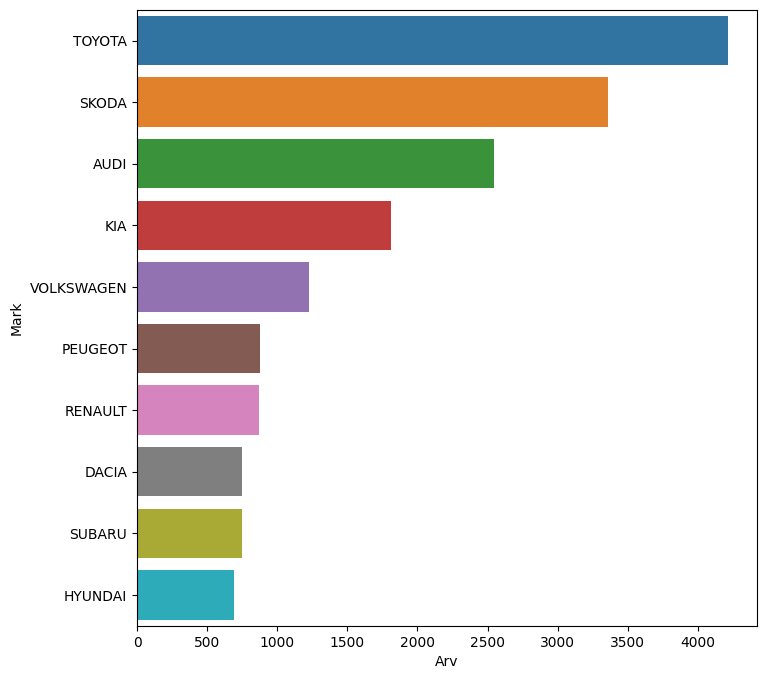

In [10]:
LIMIT = 10


def group_and_sort(data_frame, selection):
    return (
        data_frame.groupby(selection, as_index=False)["Arv"]
        .sum()
        .sort_values("Arv", ascending=False)
        .reset_index(drop=True)
    )


def group_sort_and_plot(data_frame, selection, x="Arv", y=None, limit=LIMIT, plot=True):
    data = group_and_sort(data_frame, selection)
    data.index += 1
    y = selection[0] if y is None else y
    if plot:
        plt.figure(figsize=(8, 8))
        sns.barplot(x=x, y=y, data=data[:limit], orient="h")
    print(data.head(limit))


group_sort_and_plot(df, ["Mark"])

## Top 10 popular car models

            short name   Arv
1          TOYOTA RAV4  1311
2       TOYOTA COROLLA  1151
3        SKODA OCTAVIA  1052
4         SKODA KODIAQ   737
5              AUDI Q2   736
6              AUDI A3   642
7         KIA SPORTAGE   599
8             KIA CEED   553
9   TOYOTA YARIS CROSS   510
10      SUBARU OUTBACK   493


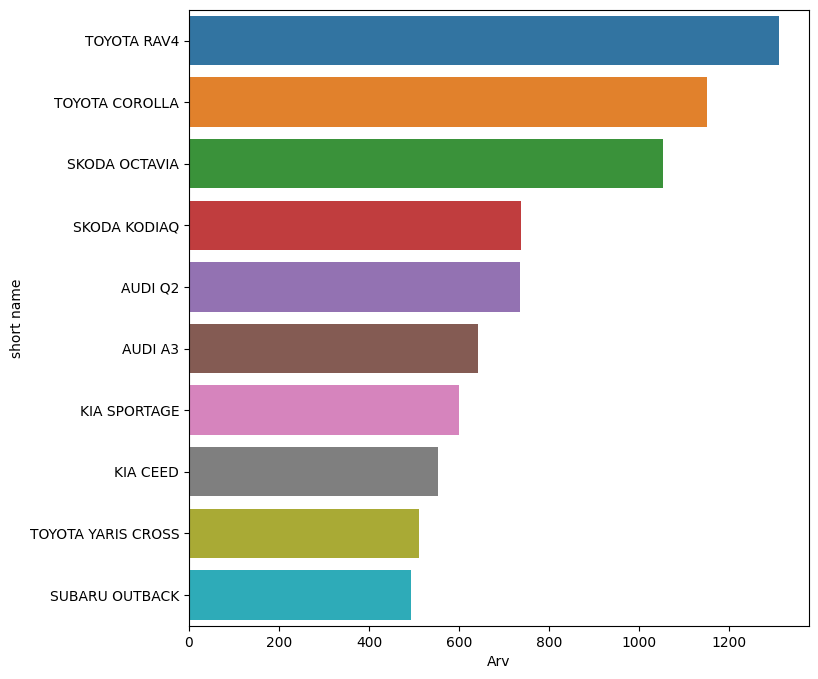

In [11]:
group_sort_and_plot(df, [COLUMN_SHORT_NAME])

### Top 10 popular diesel models

                short name  Arv
1             SKODA KODIAQ  392
2            SKODA OCTAVIA  378
3             DACIA DUSTER  227
4                  AUDI Q5  179
5             KIA SPORTAGE  114
6             PEUGEOT 5008  114
7            TOYOTA PROACE  107
8               VOLVO XC90  104
9        VOLKSWAGEN TIGUAN  103
10  MERCEDES-BENZ V-KLASSE   97


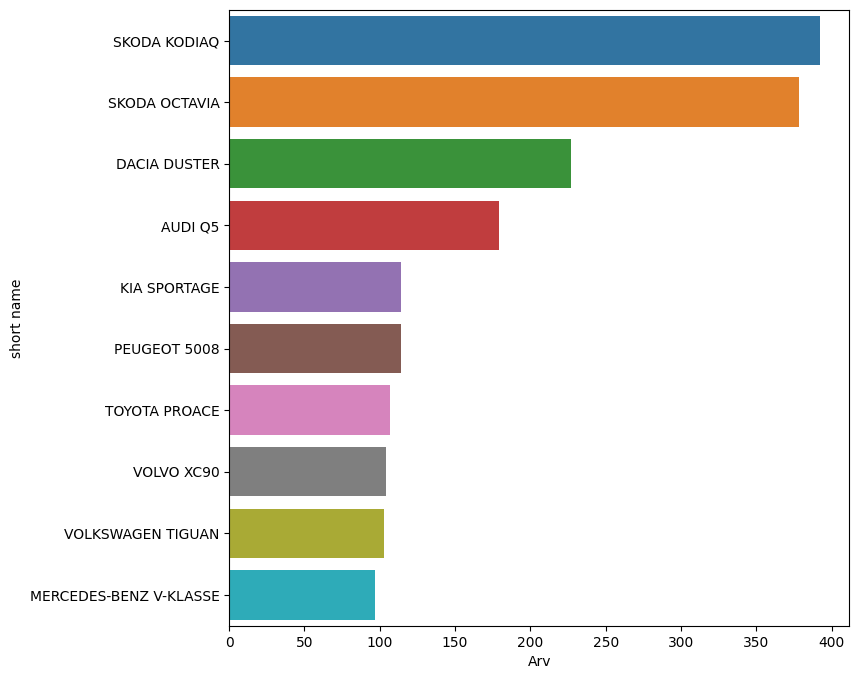

In [12]:
df_diesel = df[df["Mootori tüüp"].str.contains("DIISEL", case=False)]

group_sort_and_plot(df_diesel, [COLUMN_SHORT_NAME])

### Top 10 popular petrol models

           short name  Arv
1             AUDI Q2  725
2         TOYOTA RAV4  588
3      SUBARU OUTBACK  493
4            KIA CEED  459
5         SKODA KAMIQ  407
6        SKODA KODIAQ  345
7         SKODA KAROQ  253
8       DACIA SANDERO  211
9   VOLKSWAGEN TIGUAN  203
10       RENAULT CLIO  199


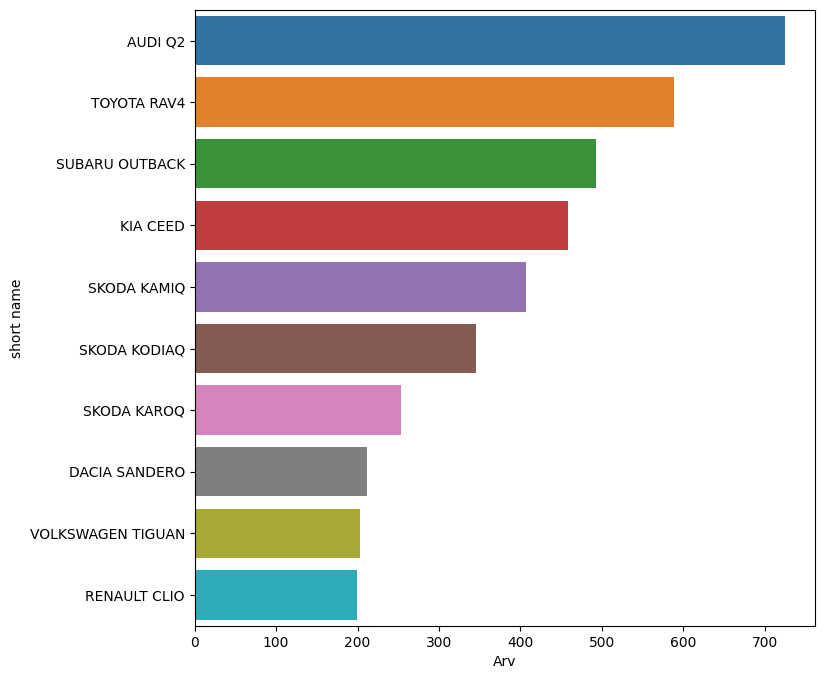

In [13]:
df_petrol = df[df["Mootori tüüp"].isin(["BENSIIN_KATALYSAATOR", "BENSIIN"])]

group_sort_and_plot(df_petrol, [COLUMN_SHORT_NAME])

### Top 10 popular hybrid models(diesel and petrol)


            short name  Arv
1       TOYOTA COROLLA  999
2          TOYOTA RAV4  723
3              AUDI A3  631
4         KIA SPORTAGE  533
5        SKODA OCTAVIA  531
6   TOYOTA YARIS CROSS  484
7          TOYOTA C-HR  355
8       NISSAN QASHQAI  289
9              AUDI Q5  241
10          HONDA CR-V  220


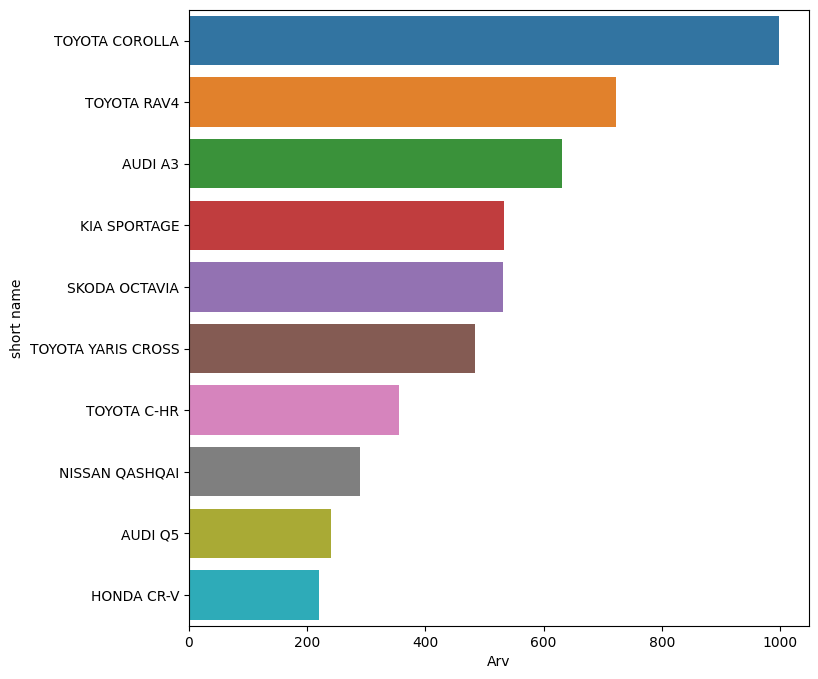

In [14]:
df_hybrids = df[df["Mootori tüüp"].str.contains("HYBRIID", case=False)]

group_sort_and_plot(df_hybrids, [COLUMN_SHORT_NAME])

### Top 10 popular electric models

         short name  Arv
1     TESLA MODEL Y  204
2       SKODA ENYAQ  161
3    HYUNDAI IONIQ5   84
4           KIA EV6   64
5           AUDI Q8   47
6       TOYOTA BZ4X   46
7       NISSAN LEAF   42
8            BMW IX   38
9     TESLA MODEL 3   38
10  VOLKSWAGEN ID.4   37


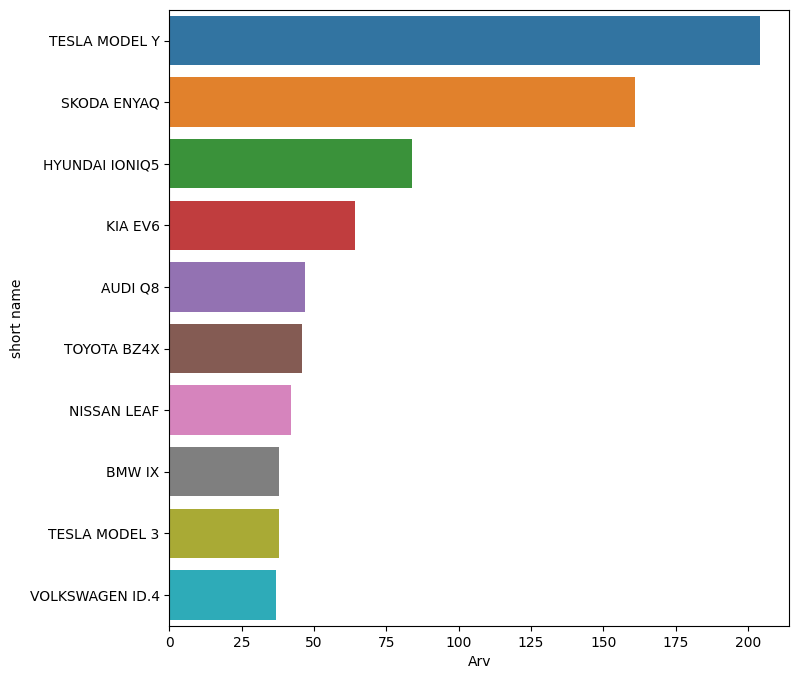

In [15]:
df_electric = df[df["Mootori tüüp"] == "ELEKTER"]

group_sort_and_plot(df_electric, [COLUMN_SHORT_NAME])

### Top 10 popular cars by private owners

            short name  Arv
1          TOYOTA RAV4  771
2       TOYOTA COROLLA  453
3        SKODA OCTAVIA  373
4         SKODA KODIAQ  350
5   TOYOTA YARIS CROSS  348
6         KIA SPORTAGE  294
7       SUBARU OUTBACK  270
8          SKODA KAMIQ  228
9          SKODA KAROQ  208
10        DACIA DUSTER  190


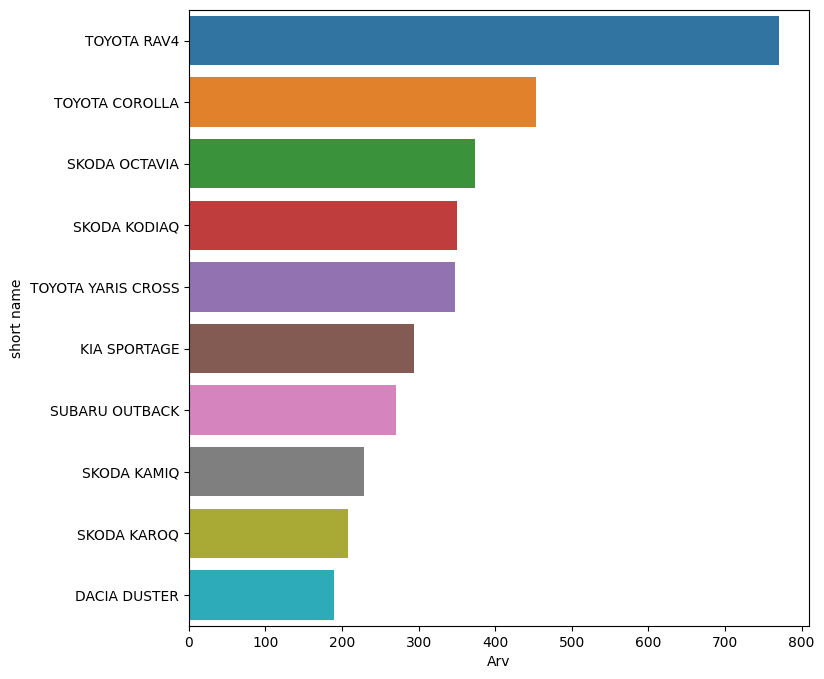

In [16]:
df_private = df[df[COLUMN_CUSTOMER].str.contains(PRIVATE_CUSTOMER, case=False)]

group_sort_and_plot(df_private, [COLUMN_SHORT_NAME])

### Top 10 popular cars by company owners

        short name  Arv
1          AUDI Q2  726
2   TOYOTA COROLLA  698
3    SKODA OCTAVIA  679
4          AUDI A3  622
5      TOYOTA RAV4  540
6         KIA CEED  415
7     SKODA KODIAQ  387
8     KIA SPORTAGE  305
9   SUBARU OUTBACK  223
10    DACIA DUSTER  223


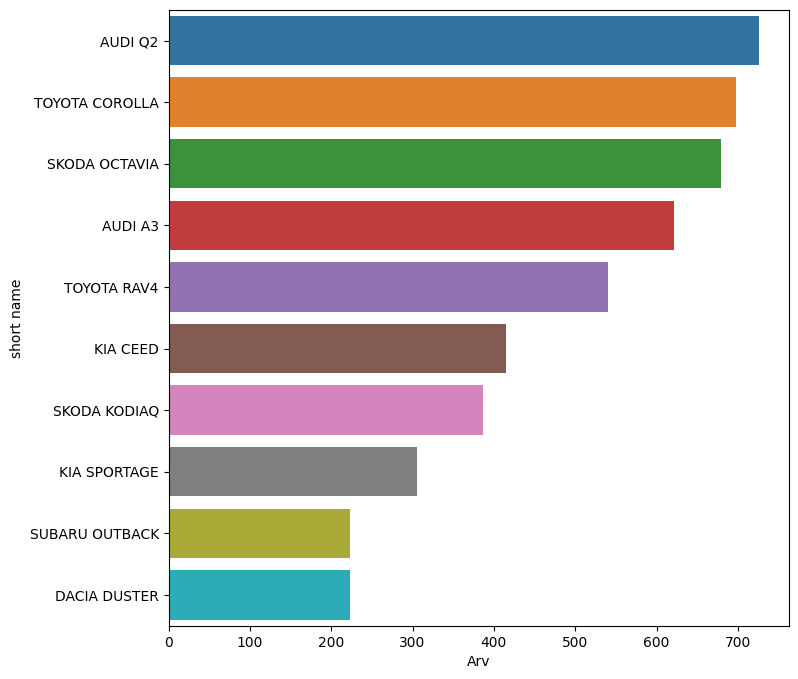

In [17]:
df_corporate = df[~df[COLUMN_CUSTOMER].str.contains(PRIVATE_CUSTOMER, case=False)]

group_sort_and_plot(df_corporate, [COLUMN_SHORT_NAME])

### SUV vs non SUV

           SUV    Arv
non-SUV  False  11690
SUV       True  11301


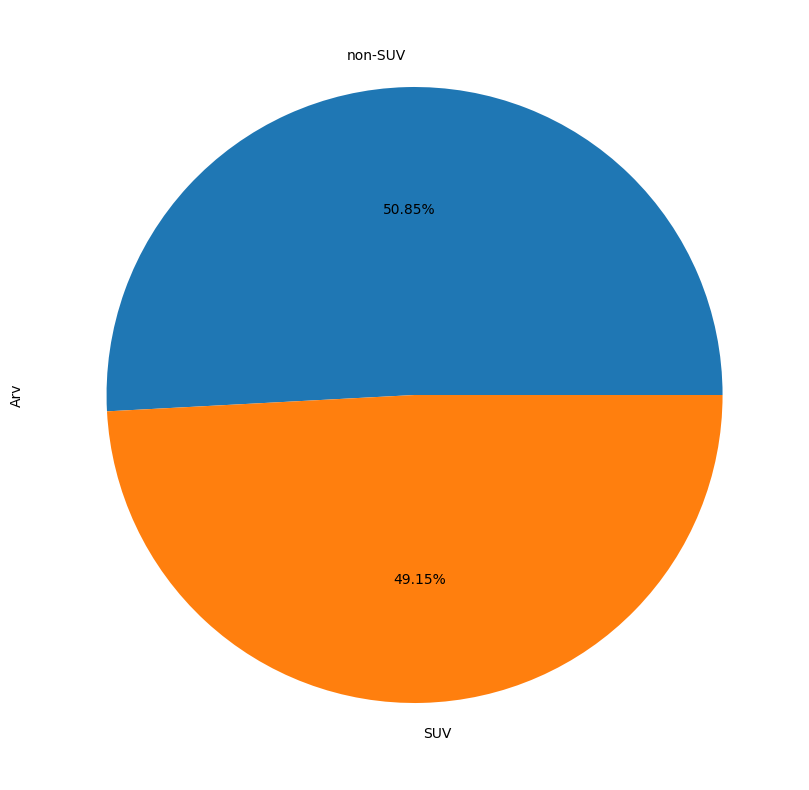

In [18]:
show_pie(df, "SUV", index=["non-SUV", "SUV"])

### Popular fuels in SUV

                       Arv
Mootori tüüp              
BENSIIN_HYBRIID       4380
BENSIIN_KATALYSAATOR  4290
DIISEL                1390
ELEKTER                649
DIISEL_HYBRIID         588
CNG                      4


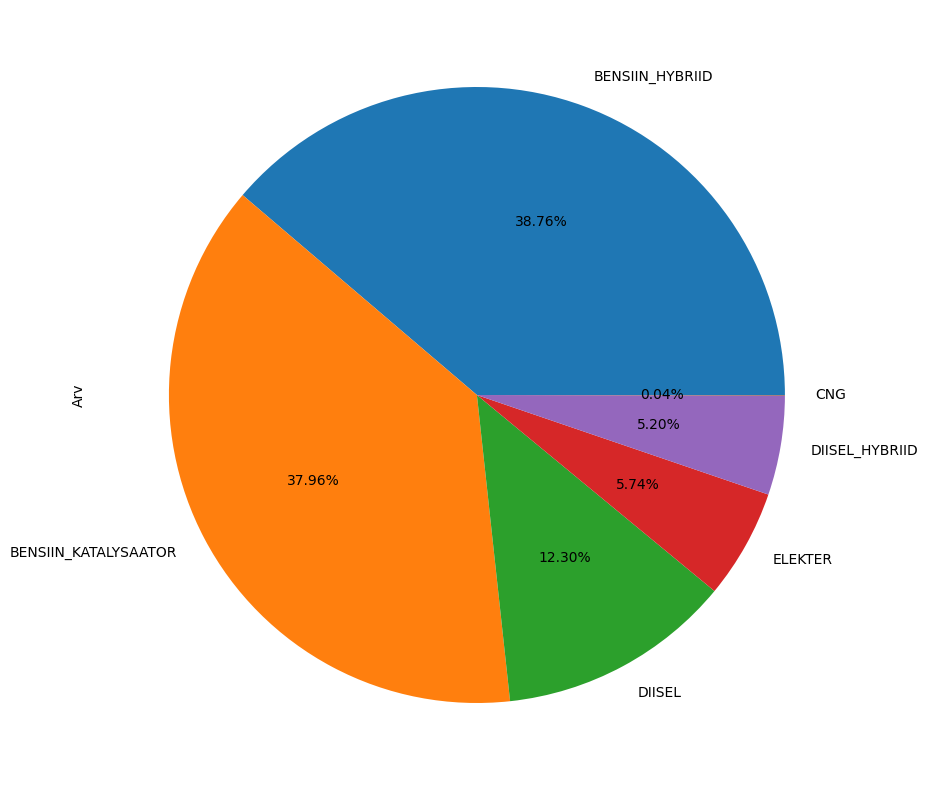

In [19]:
df_suv = df[df["SUV"]]

show_pie(df_suv, "Mootori tüüp")

### Top 10 popular SUV

            short name   Arv
1          TOYOTA RAV4  1311
2         SKODA KODIAQ   737
3              AUDI Q2   736
4         KIA SPORTAGE   599
5   TOYOTA YARIS CROSS   510
6         DACIA DUSTER   413
7          SKODA KAMIQ   411
8          TOYOTA C-HR   355
9          SKODA KAROQ   339
10   VOLKSWAGEN TIGUAN   327


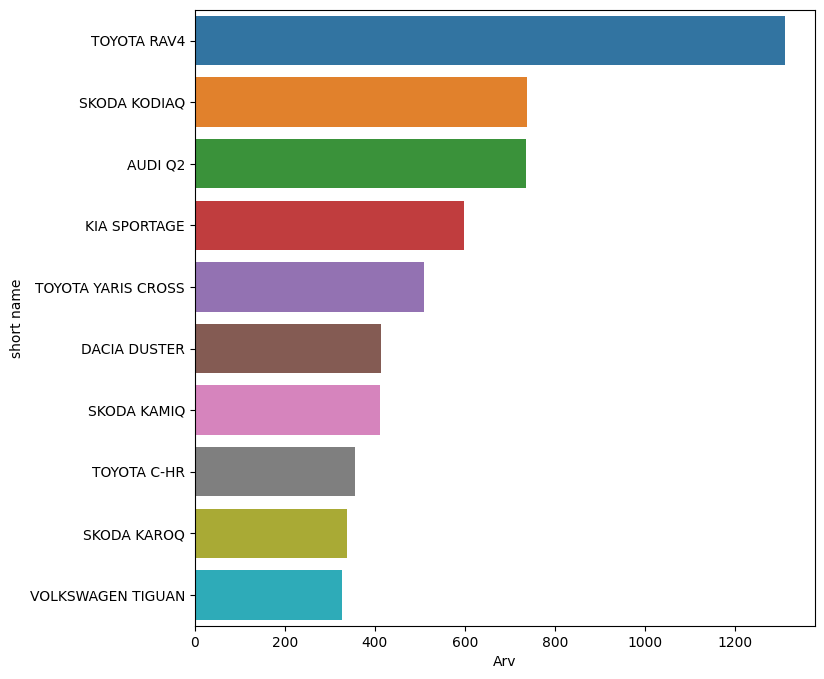

In [20]:
group_sort_and_plot(df_suv, [COLUMN_SHORT_NAME])

### Top 10 popular Diesel SUV

           short name  Arv
1        SKODA KODIAQ  392
2        DACIA DUSTER  227
3             AUDI Q5  179
4        PEUGEOT 5008  114
5        KIA SPORTAGE  114
6          VOLVO XC90  104
7   VOLKSWAGEN TIGUAN  103
8         KIA SORENTO   96
9         SKODA KAROQ   86
10       PEUGEOT 3008   65


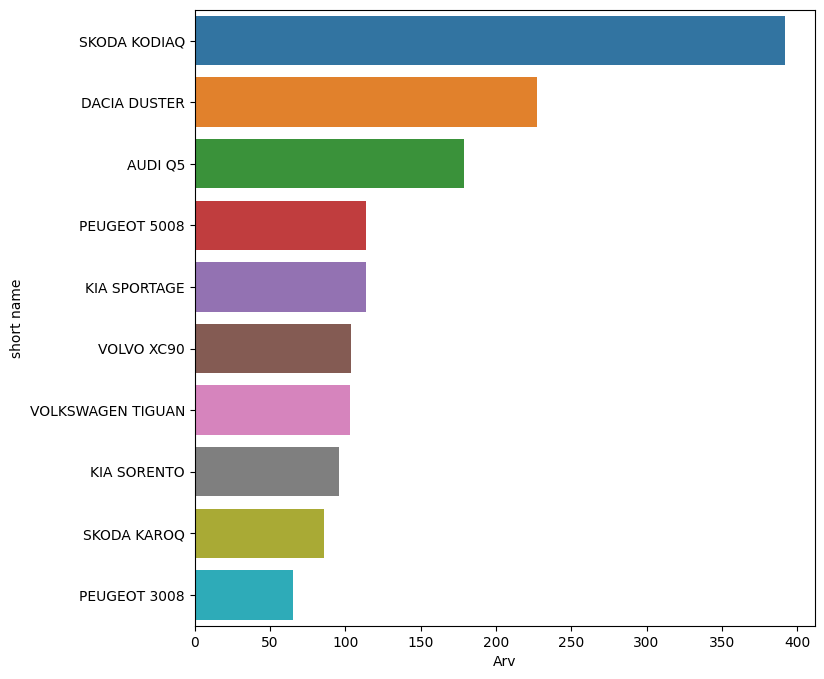

In [21]:
df_diesel_suv = df_diesel[df_diesel["SUV"]]

group_sort_and_plot(df_diesel_suv, [COLUMN_SHORT_NAME])

### Top 10 popular Petrol SUV

            short name  Arv
1              AUDI Q2  725
2          TOYOTA RAV4  588
3          SKODA KAMIQ  407
4         SKODA KODIAQ  345
5          SKODA KAROQ  253
6    VOLKSWAGEN TIGUAN  203
7   VOLKSWAGEN T-CROSS  196
8         DACIA DUSTER  186
9         PEUGEOT 2008  150
10    VOLKSWAGEN TAIGO  117


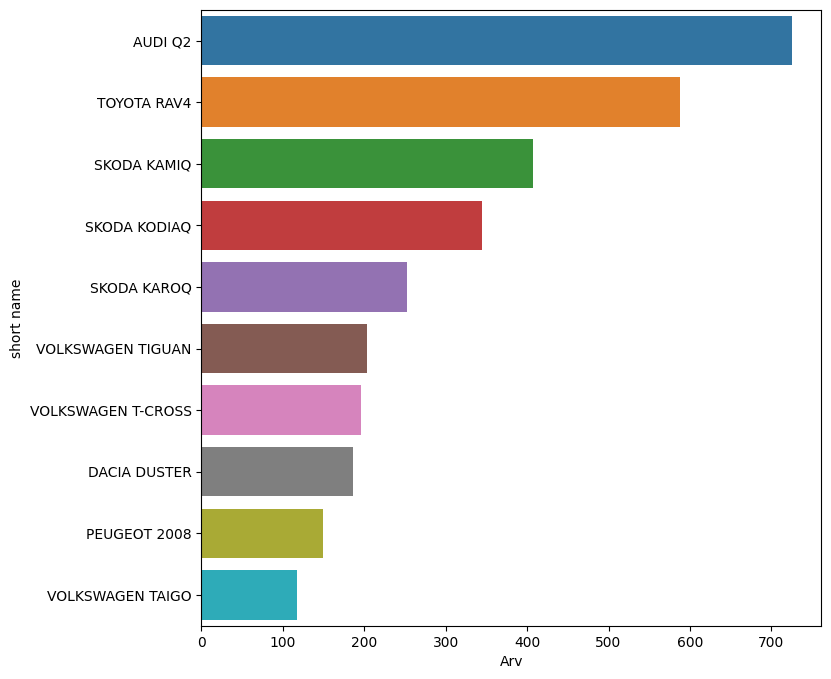

In [22]:
df_petrol_suv = df_petrol[df_petrol["SUV"]]

group_sort_and_plot(df_petrol_suv, [COLUMN_SHORT_NAME])

### Top 10 popular hybrid SUV

            short name  Arv
1          TOYOTA RAV4  723
2         KIA SPORTAGE  533
3   TOYOTA YARIS CROSS  484
4          TOYOTA C-HR  355
5       NISSAN QASHQAI  289
6              AUDI Q5  241
7           HONDA CR-V  220
8       HYUNDAI TUCSON  214
9       RENAULT ARKANA  162
10      RENAULT CAPTUR  159


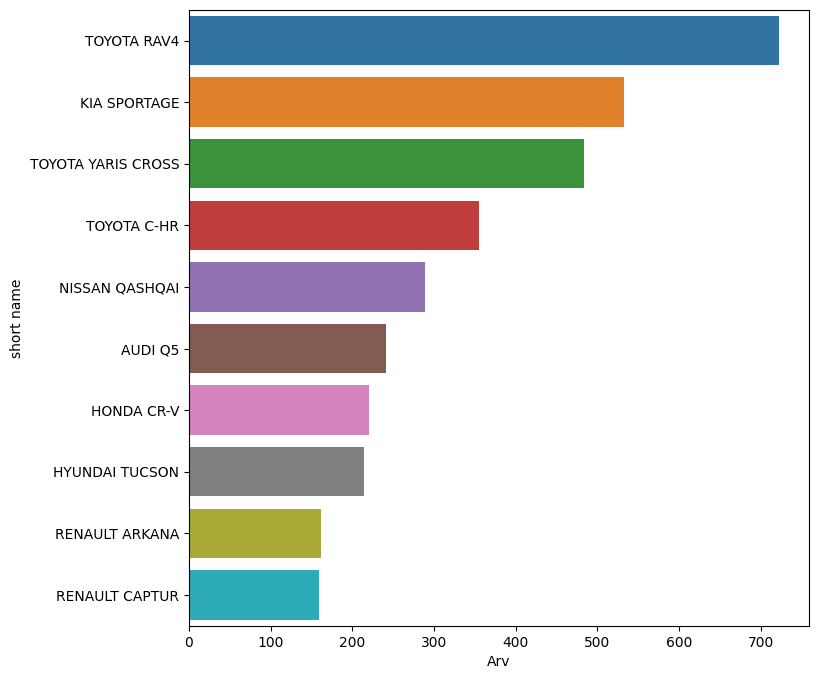

In [23]:
df_hybrid_suv = df_hybrids[df_hybrids["SUV"]]

group_sort_and_plot(df_hybrid_suv, [COLUMN_SHORT_NAME])

### Most popular models per city

In [24]:
# Popular car per each city
cities = sorted(df[COLUMN_CITY].unique())

for city in sorted(cities):
    print()
    print(city)
    group_sort_and_plot(
        df[df[COLUMN_CITY] == city], [COLUMN_SHORT_NAME], limit=3, plot=False
    )


Haapsalu
      short name  Arv
1   KIA SPORTAGE   11
2  SKODA OCTAVIA    6
3       KIA CEED    6

Keila
       short name  Arv
1   SKODA OCTAVIA    7
2     TOYOTA RAV4    6
3  SUBARU OUTBACK    6

Kohtla-Järve
          short name  Arv
1        TOYOTA RAV4   20
2       SKODA KODIAQ   11
3  VOLKSWAGEN TIGUAN    8

Loksa
    short name  Arv
1   HONDA CR-V    1
2     KIA CEED    1
3  KIA PROCEED    1

Maardu
       short name  Arv
1   SKODA OCTAVIA   23
2     TOYOTA RAV4   17
3  TOYOTA COROLLA   16

Määramata
       short name  Arv
1     TOYOTA RAV4  411
2   SKODA OCTAVIA  382
3  TOYOTA COROLLA  359

Narva
     short name  Arv
1  KIA SPORTAGE   35
2   TOYOTA RAV4   27
3  SKODA KODIAQ   16

Narva-Jõesuu
           short name  Arv
1         TOYOTA RAV4    7
2      TOYOTA COROLLA    5
3  TOYOTA YARIS CROSS    4

Paide
       short name  Arv
1  TOYOTA COROLLA   10
2     TOYOTA RAV4    7
3   SKODA OCTAVIA    7

Pärnu
      short name  Arv
1    TOYOTA RAV4   34
2     SUZUKI SX4   32
3  SKODA O

# Top 3 for each mark

In [25]:
df_group = group_and_sort(df, ["Mark"])
marks = df_group.head(20)["Mark"].tolist()
df_group.set_index("Mark", inplace=True)

for mark in marks:
    models = df[df["Mark"] == mark]
    count = df_group.loc[mark, "Arv"]
    print(f"{mark} total: {count}")
    if not models.empty:
        print(f"Top 3 {mark} models")
        group_sort_and_plot(models, [COLUMN_SHORT_NAME], limit=3, plot=False)
        print()

TOYOTA total: 4211
Top 3 TOYOTA models
           short name   Arv
1         TOYOTA RAV4  1311
2      TOYOTA COROLLA  1151
3  TOYOTA YARIS CROSS   510

SKODA total: 3358
Top 3 SKODA models
      short name   Arv
1  SKODA OCTAVIA  1052
2   SKODA KODIAQ   737
3    SKODA KAMIQ   411

AUDI total: 2544
Top 3 AUDI models
  short name  Arv
1    AUDI Q2  736
2    AUDI A3  642
3    AUDI Q5  241

KIA total: 1813
Top 3 KIA models
     short name  Arv
1  KIA SPORTAGE  599
2      KIA CEED  553
3   KIA PROCEED  122

VOLKSWAGEN total: 1228
Top 3 VOLKSWAGEN models
           short name  Arv
1   VOLKSWAGEN TIGUAN  327
2  VOLKSWAGEN T-CROSS  196
3     VOLKSWAGEN GOLF  121

PEUGEOT total: 880
Top 3 PEUGEOT models
     short name  Arv
1  PEUGEOT 2008  197
2   PEUGEOT 208  179
3   PEUGEOT 408  130

RENAULT total: 873
Top 3 RENAULT models
       short name  Arv
1  RENAULT CAPTUR  243
2    RENAULT CLIO  214
3  RENAULT ARKANA  162

DACIA total: 750
Top 3 DACIA models
      short name  Arv
1   DACIA DUSTER  41

# Top private diesel cars

                  short name  Arv
1               SKODA KODIAQ  174
2              SKODA OCTAVIA  144
3               DACIA DUSTER   76
4               PEUGEOT 5008   59
5               KIA SPORTAGE   57
6          VOLKSWAGEN TIGUAN   53
7                SKODA KAROQ   47
8   TOYOTA PROACE CITY VERSO   30
9                KIA SORENTO   28
10                VOLVO XC90   26


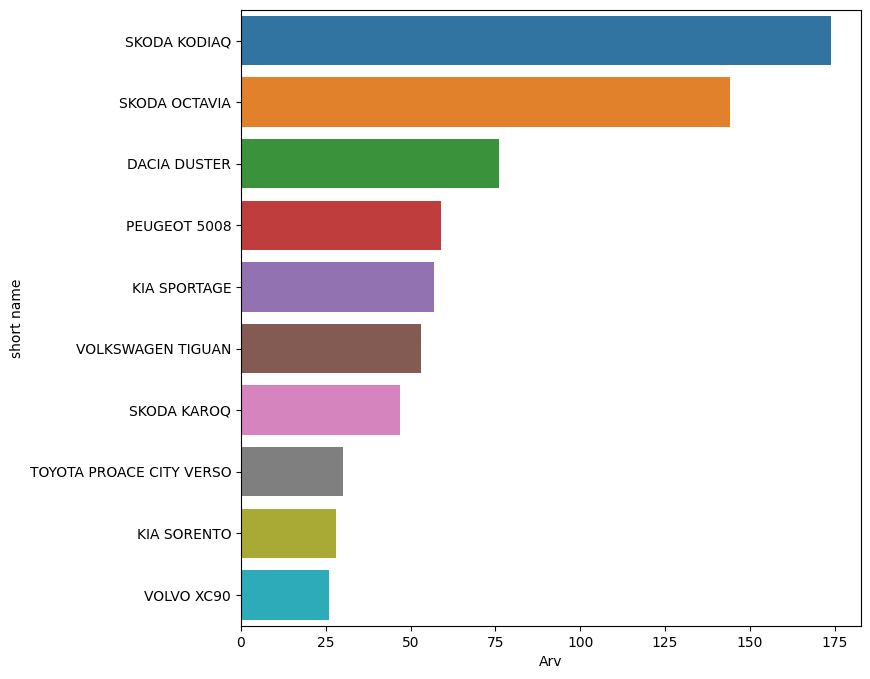

In [26]:
df_diesel_private_suv = df_diesel[
    df_diesel[COLUMN_CUSTOMER].apply(lambda x: PRIVATE_CUSTOMER in x)
]

group_sort_and_plot(df_diesel_private_suv, [COLUMN_SHORT_NAME])